In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels

%matplotlib inline

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## 3. Statistical Model

In the prior notebook we worked on downloading, exploring and combining data into a useful representation for modeling. In this notebook we will begin building a framework that will fit a model to the data. Specifically, we will build a weighted-least squares regression model to predict the forward 1M return of the S&P 500 using a set of macroeconomic variables. 

<div class="alert alert-info" role="alert">
<span class="label label-primary"> The Paper </span>

2.2 Statistical Model 

Consider a forecasting regression of target 𝑌 𝑡+1 using a set of predictors 𝑍𝑗,𝑡: 
<br><br>


<div class="alert alert-info" role="alert">
![](statistical_model_1.png "Title")

<div class="alert alert-info" role="alert">

<a id='#snap_back_1'></a>
Where 𝛼 is the regression intercept, 𝛽𝑗 are the forecasting coefficients, and 𝜀𝑡+1 is the forecast error.  In our application, 𝑌 𝑡+1 are the one-month ahead <a href='#supplemental_content_1'>equity risk premium</a>, and 𝑍𝑗,𝑡 are return predictors which are known this month.  The most commonly used and perhaps the best understood method to estimate the model above is using Ordinary Least Squares (OLS).  OLS has the following objective function:  
<br><br>



<div class="alert alert-info" role="alert">
![](statistical_model_2.png "Title")

<div class="alert alert-info" role="alert">

We search over possible values for the forecasting coefficients and intercept, 𝛼 and 𝛽𝑗, to minimize the sum of squared residuals. 
<br><br>

By construction, OLS puts equal weight on all data points.  Standing at time 𝑡, 𝑌 𝑡−1 receives the same weight as 𝑌 𝑡−12, which means the observation one year ago is just as important in estimating model coefficients as the observation last month.  While weighting observations equally is simple and easy to understand, as the economy evolves, more recent data may be more relevant compared to older data.  To allow for recent data to have a larger impact on our model, we consider weighted least square (WLS) with the following objective function: 
<br><br>


<div class="alert alert-info" role="alert">
![](statistical_model_3.png "Title")

<div class="alert alert-info" role="alert">

<a id='#snap_back_2'></a>
<a id='#snap_back_3'></a>
Where 𝜌 is the decay factor which we set to 0.99 at the monthly frequency.  This value implies a half-life of approximately 60 months.  Varying the value of 𝜌 such that the half-life of the <a href='#supplemental_content_2'>weights</a> ranges between 30 and 120 months does not materially affect our results.  OLS is a special case of <a href='#supplemental_content_3'>WLS</a> if we set 𝜌 to be one.   
<br><br>

We consider 15 forecasting variables, which means each time we fit the model we need to estimate 15 forecasting coefficients plus the intercept term for a total of 16 parameters.  We limit the number of estimated parameters through variable selection, which leads to more parsimonious models and generally results in better out-of-sample forecasting properties.  Parsimonious models are also easier to interpret and attribute performance.  It is easier to understand which variables contribute to forecasting results when there are fewer variables to consider.   
<br><br>


<span class="label label-warning"> Assessment: Remember </span>
    
Which of the following are true?

 * In the WLS formulation we use, older data points have lower influence on the model than more recent observations

 * OLS is a special case of WLS but with a half life of 0.99

 * In WLS we calibrate model coefficients by minimizing the sum of squared weights. 

 * The equity risk premium we use should be the return of the SPY ticker, to proxy the return of the S&P 500.

 * We use WLS, rather than OLS, in order to represent more expressive, nonlinear functions



<span class="label label-warning"> Assessment: Understand </span>

The weight for each observation t is parameterized by our selection of rho (the greek letter that looks like "p") and the value of T (the total number of observations in the dataset). Would the weight of the first observation (the most distant one) be greater with a rho of 0.99 and a total of 300 observations or the weight for the 200th observation with a rho of 0.95 and 500 observations?

In [ ]:
# TO DO

In [42]:
# option 1: first observation with rho = 0.99 and T = 300
print('option1:', 0.99 ** (300-1))
print('option2:', 0.95 ** (500-200))
print('option1 has the greater weight')

option1: 0.04953625663766235
option2: 2.075303347768056e-07
option1 has the greater weight


<span class="label label-warning"> Assessment: Understand </span>

Compare the weights for each observation for different values of rho and T. Describe the shape of the weight curves for varying levels of rho. 

If you want to put less weight on a more distant observation, should you use a lower or higher value of rho?


In [ ]:
# TODO

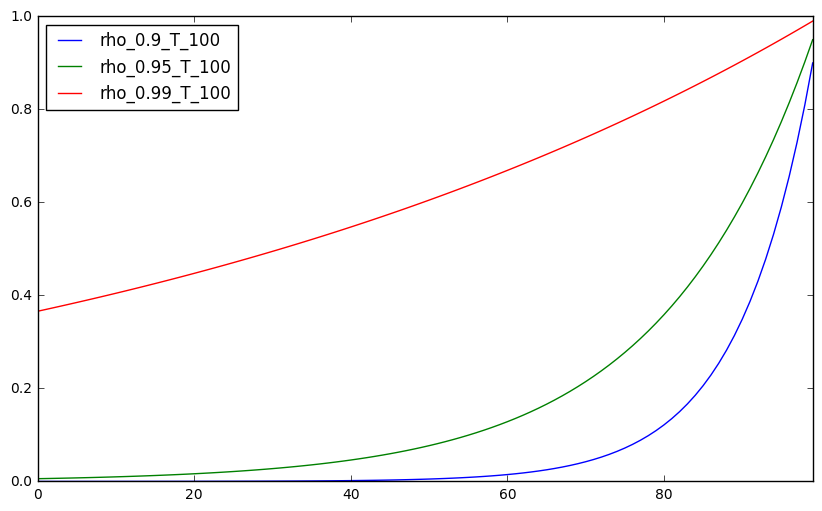

In [4]:
#######################################
# SAMPLE
# DO NOT MAKE ANY CHANGES IN THIS CELL
#######################################

ro = 0.99
big_t = 100
small_t = range(100)
f, axes = plt.subplots(1,1, figsize = (10,6))

# let's plot the "weight-curves" using different values of rho and T

# try different values of rho
for rho in [0.90, 0.95, 0.99]:

    # try different values of T
    for big_t in [100]:
        
        # create a dataframe to store results for the specified rho and T values
        df = pd.DataFrame()
        small_t = range(big_t)
        result = []
        
        # iterate through every value of t from 0 to T
        for t in small_t:
            
            # calculate the weight at t and collect the results
            result.append(rho**(big_t - t))
        
        # attach the results to the dataframe
        df['rho_{}_T_{}'.format(rho, big_t)] = result

        df.plot(ax = axes)
        
# higher levels of rho lead to a flatter weight curve while lower levels lead to steeper, more bowed curves.

# for the same number of observations, lower rho values will mean less weight and less influence of early observations
# and relatively greater influence of more recent observations
        

<span class="label label-warning"> Assessment: Apply </span>

Use the dataset you assembled at the end of Notebook 2 and fit a WLS regression model to the first 100 observations (so big "T" is 100). The point is to use the explanatory variables to try to predict the market return. Save a dictionary with the model coefficients, R^2, and any other metric that you think is important to record. 


In [ ]:
# TODO


In [215]:
#######################################
# SAMPLE
# DO NOT MAKE ANY CHANGES IN THIS CELL
#######################################


training_data = pd.read_hdf('training_data.hdf')

# define a function to run a regression on a given set of data
def WLS_regression(data, 
                   x_vars = ['industrial_production', 'change_inflation', 'credit_risk_premium',
           'slope_interest_rate', 'housing_starts', 'delinquencies', 'change_unemployment'],
                   rho = 0.99):
    
    df = data.copy()
    df.dropna(axis = 0, inplace = True)
    
    # make sure the data is sorted chronologically
    df.sort_values(by = 'portfolio_date', inplace = True)
    
    # get the number of observations in the dataset
    big_t = df.shape[0] + 1
    
    # construct the weights to use for each observation
    # the most distant observation will have a small weight
    # and the most recent observation will have a big weight
    weights = []
    for small_t in range(1, big_t):
        weights.append(rho**(big_t - small_t))
    weights = np.array(weights)
    
    # create the explanatory variables
    X = df[x_vars]
    
    # now fit a model using the statsmodel WLS function
    #sm.WLS(y_data, x_data, weights)
    model_wls = sm.WLS(df['forward_spy_return'], statsmodels.tools.tools.add_constant(X), weights = weights)
    fit_wls = model_wls.fit()
    
    # save the coefficients into a dictionary
    results = fit_wls.params.to_dict()
    
    # add the r-squared, number of observations, etc
    results['r_squared'] = fit_wls.rsquared
    results['r_squared_adjusted'] = fit_wls.rsquared_adj

    results['n_obs'] = fit_wls.nobs
    results['mse'] = fit_wls.mse_total
    results['aic'] = fit_wls.aic
    results['model_vars'] = list(fit_wls.params.to_dict().keys())
    
    # add the pvalues (statistical significance of each coefficient)
    pvalues_dict = fit_wls.pvalues.to_dict() 
    for p in pvalues_dict.keys():
        results['{}_pval'.format(p)] = pvalues_dict[p]
        
    # add the date of the estimation
    results['portfolio_date'] = df['portfolio_date'].max()
    
    return results


results = WLS_regression(training_data.iloc[0:100], rho = 0.99)
results

{'aic': -268.58412817053119,
 'change_inflation': 0.06052813558541774,
 'change_inflation_pval': 0.8870441193928381,
 'change_unemployment': -0.03266824063461128,
 'change_unemployment_pval': 0.3657847595434157,
 'const': 0.003675668788690407,
 'const_pval': 0.8601092878060164,
 'credit_risk_premium': -0.00014146255549320284,
 'credit_risk_premium_pval': 0.9911820245997037,
 'delinquencies': -1.3081304164003558,
 'delinquencies_pval': 0.6977624226152614,
 'housing_starts': 0.029333244445516545,
 'housing_starts_pval': 0.7333870338800501,
 'industrial_production': 0.026741398922319123,
 'industrial_production_pval': 0.48606854251516063,
 'model_vars': ['delinquencies',
  'change_unemployment',
  'housing_starts',
  'industrial_production',
  'const',
  'change_inflation',
  'credit_risk_premium',
  'slope_interest_rate'],
 'mse': 0.0014014091191013741,
 'n_obs': 85.0,
 'portfolio_date': Timestamp('2005-03-31 00:00:00'),
 'r_squared': 0.035339045883256981,
 'r_squared_adjusted': -0.05235

<span class="label label-warning"> Assessment: Analyze </span>

In their introduction, Hull et al. indicated as thus:

"We use weighted least squares (WLS) regression with stepwise variable selection to build a forecasting model for next month’s market excess returns.  We estimate our forecasting model at the end of every month using an expanding window."

At this point we've implemented WLS. Let's look at the next part about re-estimating a new model at the end of each month. 

Hull et al. have said before that "as the economy evolves, more recent data may be more relevant compared to older data." By re-estimating the model each month they expect to capture market behavior that emerges each month that might not have any historical precedent. 

Compare the model that you would generate in 2006 compared to the model you would generate in 2016. What are the differences? Can you construct a narrative that might explain what you see?

In [ ]:
# TODO

                     var     y2006     y2016
0          delinquencies -0.840086 -0.023595
0    change_unemployment -0.021277 -0.041203
0         housing_starts  0.025248 -0.017528
0  industrial_production  0.016431 -0.008672
0                  const  0.013646  0.000879
0       change_inflation  0.121242  0.053859
0    credit_risk_premium -0.003583  0.007421
0    slope_interest_rate -0.297296 -0.323293


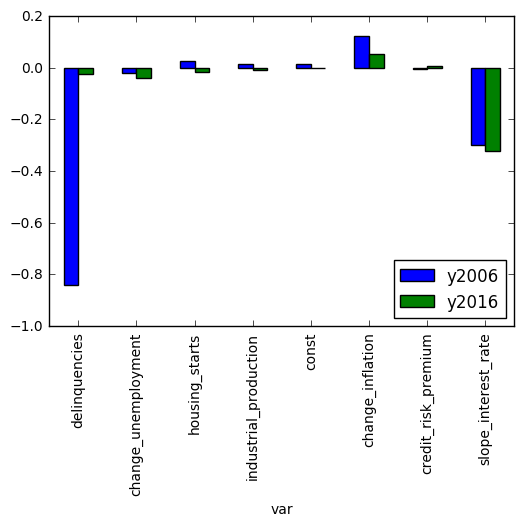

In [218]:
#######################################
# SAMPLE
# DO NOT MAKE ANY CHANGES IN THIS CELL
#######################################
# run the model using data through December 2006
results_2006 = WLS_regression(training_data.iloc[0:121], rho = 0.99)
results_2006

# run the model using data through December 2016
results_2016 = WLS_regression(training_data.iloc[0:241], rho = 0.99)
results_2016

# collect the coefficients for each variable using the 2006 and 2016 dataset
# and compare them:
comparison = pd.DataFrame()
for var in results_2016['model_vars']:
    temp = pd.DataFrame({'var': [var],
                        'y2006': [results_2006[var]],
                        'y2016': [results_2016[var]]})
    comparison = comparison.append(temp)
    
# below you can see that the coefficient for delinquencies has swung dramatically from 2006 to 2016. 
# perhaps counter intuitively, in 2016 delinquencies have less impact on future market returns. This is
# despite the fact that the 2016 period included the 2008 financial crisis and housing market collapse

# furthermore, increased housing starts used to be positively correlated with market returns (2006 period)
# but in the 2016 period it is negatively correlated. This flip in the coefficient sign will be difficult to handle. 
# recall in Notebook 2 that collected the expected coefficient signs for each variable. This is showing that the coefficient,
# in addition to just becoming bigger or smaller over time, can also outright flip sign. What does that mean when  
# we compare the actual derived coefficient sign with our expected coefficient sign? How much trust
# should we put into the results if they counter our expectations? Changes in industrial production 
# and the credit risk premium variables also saw a reversal in coefficient signs. 
    
comparison.set_index('var').plot.bar()
print(comparison)

<span class="label label-warning"> Assessment: Evaluate </span>

In the "Assessment: Apply" exercise above you were tasked to "save a dictionary with the model coefficients, R^2, and any other metric that you think is important to record." Hopefully you thought that maybe saving information about model performance would be useful. 

What are some traditional ways of evaluating a linear regression model? Hull et al. mention using the root mean square error (RMSE) and we'll utilize that later when we actually construct trade positions. Another metric that indicates how good your model is fitting the data is the R^2 which hopefully you already have some experience with. If not, here are some resources: 

http://statisticsbyjim.com/regression/interpret-r-squared-regression/

http://analyticspro.org/2016/03/14/r-tutorial-interpretation-of-r-squared-and-adjusted-r-squared-in-regression/

Let's talk about R^2 in trading. Brace yourself but R^2 values in predicting stocks usually look terrible. 

This resource gives us a few example R^2 values:
 * predict the height of a building based on the number of stories: R^2 of 90%
 * predict how far a driver can see based on driver's age: R^2 of 64%
 
https://onlinecourses.science.psu.edu/stat462/node/97/

And this data source recommends that R^2 of 60% are usual for pure science fields and closer to 10% for social sciences. 

https://www.researchgate.net/post/what_is_the_acceptable_r-squared_value

Well... for predicting stock returns a usual R^2 is less than 2%

https://quant.stackexchange.com/questions/33432/r-squared-statistic-in-predictions-of-returns

Critique the performance of the model based on some of the data you've assembled so far. Hull et al. used the 2003 to 2017 period for their analysis so let's do that too. How should you design an R^2 test? For now you can just test the in-sample R^2. So collect the R^2 everytime you estimate each monthly model.  

In [ ]:
# TODO

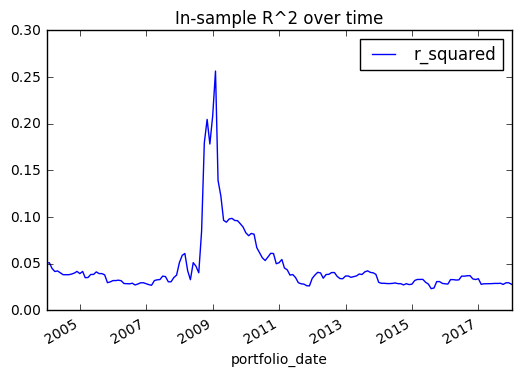

In [225]:
#######################################
# SAMPLE
# DO NOT MAKE ANY CHANGES IN THIS CELL
#######################################


# let's get the 'in-sample' r^2 everytime we estimate the model parameters
# this is the R^2 that is based on the difference between actual and predicted S&P 500 monthly returns

# for my data, the 85th row corresponds to December 2003 and the 254th row corresponds to December 2017
# iterate from 85 to 254 to cover each expanding window
dates_results = []
r_squared_results = []
for i in range(85, 254):
    
    # estimate the model on the trailing data
    results = WLS_regression(training_data.iloc[0:i], rho = 0.99)
    
    # collect the date and r^2 to use later in a chart
    dates_results.append(results['portfolio_date'])
    r_squared_results.append(results['r_squared'])
    
# let's make a dataframe and chart the results
df = pd.DataFrame({'portfolio_date': dates_results,
                  'r_squared': r_squared_results})
df.sort_values(by = 'portfolio_date', inplace = True)
df.set_index('portfolio_date').plot(title = 'In-sample R^2 over time')
    
# Below you can see that the R^2 are far higher than the ~1.5% R^2 benchmark for forecasting stock returns. 
# At times, the R^2 is phenomenal (near 25%)
# so this is a really good sign that we can predict the market

<span class="label label-warning"> Assessment: Create </span>

Now design a test for out-of-sample.  To do that think about what would be considered your in-sample dataset and what constitutes the out-of-sample dataset given that you are using an expanding window with monthly re-estimations of the model coefficients. 

Having good in-sample performance is nice but it's ultimately not what you are trying to target. What you want is high out-of-sample performance. With in-sample data, you are essentially embracing data leakage and incorporating data from the future. For example, let's say that I estimate a model in 2018 using data from 1990 to 2000. I know what the market returns were from 1990 and 2000 and therefore used that to estimate the model. When I then estimate the model I should not be surprised if I fit a model that does a good job of predicting the market returns in 1993 because the 1993 period was part of the data used to construct the model in the first place. What would be more impressive is if a model that used data from 1990 to 2000 was able to predict the market in 2001. 

Design a testing procedure to evaluate your model "out-of-sample". By out-of-sample we mean that you should estimate your model on a training data set, and then use the model you just estimated on another sample of data. This 'out-of-sample' data should not have been part of the training data. 



In [ ]:
# TODO

[example pseudocode]

iterate through each monthly date

    construct the the in-sample data as all data through the month prior to this month
    estimate the model coefficients
    
    construct the out-of-sample data as the specified monthly date (only one row of data)
    make the prediction for the specified monthly date's 1M forward market return
    
    collect the predicted return and the actual return of the current month
    
calculate the R^2 between actual and predicted returns over all the months iterated over above
    

### End Lesson

That's it for this notebook. You can proceed to the next workbook

[intentionally left blank]
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>


<span class="label label-success"> Commentary and Supplemental Content </span>
<a id='#supplemental_content_3'></a>    
    
Below is a simple demonstration of weighted vs un-weighted regression on some artificial data.


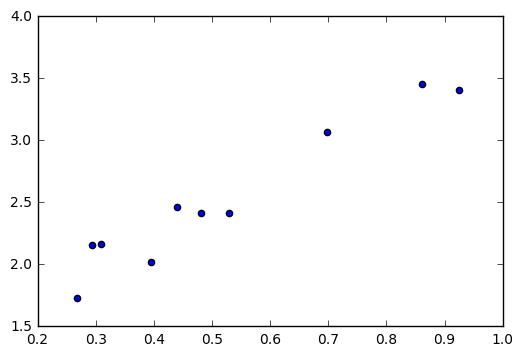

In [129]:
# create 10 random values (between 0 and 1)
x1 = np.random.random(10)

# create y values for each x value
# y is a linear function of x (ex: y = mx + b)
# where we set m = 2.5, b = 1.0
# and then we add some random noise (so there won't be a perfectly fit curve)
y1 = 2.5 * x1 + 1.0 + np.random.random(10) * 0.5

# now plot x,y in a scatter plot

plt.scatter(x1,y1)

In [130]:
# now let's fit a line to the points above
# we'll use a regular regression (OLS)

# (note below that we add a constant term to the data)

model_ols = sm.OLS(y1, statsmodels.tools.tools.add_constant(x1))
fit_ols = model_ols.fit()
print(fit_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     118.8
Date:                Thu, 05 Jul 2018   Prob (F-statistic):           4.45e-06
Time:                        16:03:16   Log-Likelihood:                 5.4449
No. Observations:                  10   AIC:                            -6.890
Df Residuals:                       8   BIC:                            -6.285
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2644      0.126     10.018      0.0

C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


Note above that the constant is ~1.26 and the coefficient is 2.43. These are very close to the values we set before (b = 1.0 , m =  2.5). So we were able to fit a good curve and find the actual parameters that were used to generate the data. 

Now let's create another set of data but generate the y-values using different parameters. Let's set m = 5.0 and b = 10.0. 

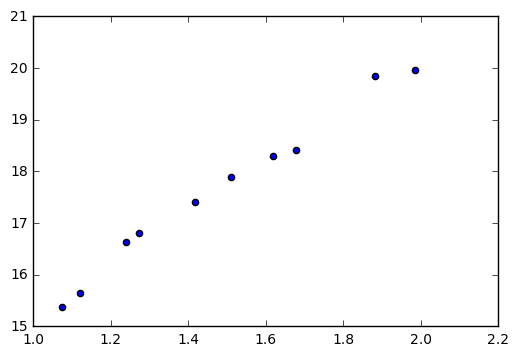

In [131]:
# create 100 random values (between 0 and 1)
x2 = np.random.random(10) + 1.0

# create y values
y2 = 5.0 * x2 + 10.0 + np.random.random(10) * 0.5
plt.scatter(x2,y2)

In [132]:
# and again, let's fit a curve to this second set of data
model_ols = sm.OLS(y2, statsmodels.tools.tools.add_constant(x2))
fit_ols = model_ols.fit()
print(fit_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     556.6
Date:                Thu, 05 Jul 2018   Prob (F-statistic):           1.11e-08
Time:                        16:06:21   Log-Likelihood:                 3.0876
No. Observations:                  10   AIC:                            -2.175
Df Residuals:                       8   BIC:                            -1.570
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.2164      0.320     31.891      0.0

C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


Again, we were able to fit a curve that matches the data well and the derived coefficients match the actual data-generating parameters. 

What happens if we combine the first and second datasets? 

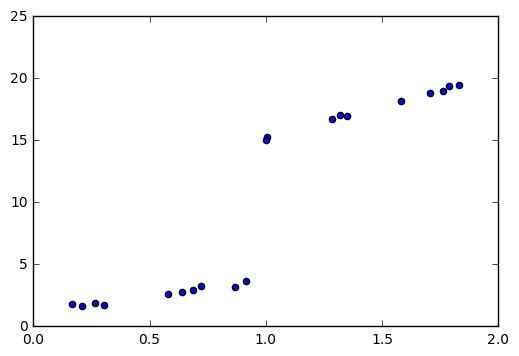

In [111]:
x = np.concatenate((x1,x2))
y = np.concatenate((y1,y2))
plt.scatter(x,y)

We can clearly see that the two datasets behave differently and are governed by two different processes (we can relate this to the investment world by speculating that maybe the market behavior during a recession versus market behavior during an expansion are governed according to different norms). 

Let's try to fit a single model to the combined dataset.

In [133]:

model_ols = sm.OLS(y, statsmodels.tools.tools.add_constant(x))
fit_ols = model_ols.fit()
print(fit_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     101.3
Date:                Thu, 05 Jul 2018   Prob (F-statistic):           8.10e-09
Time:                        16:10:39   Log-Likelihood:                -50.058
No. Observations:                  20   AIC:                             104.1
Df Residuals:                      18   BIC:                             106.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8434      1.460     -1.947      0.0

We end up with a slope of around 13 and an intercept of around -3... which is vastly different than the slopes and intercepts when we viewed either dataset in isolation. 

Now let's imagine we want to pay less attention to the second dataset. Say we believe that the datasets represent observations we made on some phenomenon but we strongly believe that our instruments were malfunctioning when we took the measurements of the second group. We could just drop those observations entirely but we decide to keep them because maybe they do hold some value.

In order to "pay less attention" to some data we can weight those observations less. 

In [137]:
# the weights for the first ten observations (the first group)
# each get a weight of 1
w1 = np.array([1.] * 10)

# the weights for the next ten observations (the second group)
# each get a smaller weight
w2 = np.array([.001] * 10)
w = np.concatenate((w1,w2))

# view the weights 
# the first ten weights are 1
# while the next ten weights are much smaller than 1
w


array([ 1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
        1.   ,  1.   ,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,
        0.001,  0.001,  0.001,  0.001])

In [138]:
# now fit a model to all of the data, but using the uneven weights
model_wls = sm.WLS(y, statsmodels.tools.tools.add_constant(x), weights = w)
fit_wls = model_wls.fit()
print(fit_wls.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            WLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     51.62
Date:                Thu, 05 Jul 2018   Prob (F-statistic):           1.09e-06
Time:                        16:18:15   Log-Likelihood:                -38.823
No. Observations:                  20   AIC:                             81.65
Df Residuals:                      18   BIC:                             83.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1219      0.225      4.980      0.0

In increasing the relative weight of the first group versus the second, we can see that the new coefficients closely match the parameters that were used to generate the data in the first group. 

Let's look at that visually. Below you can see the fitted line in red and how it does a good job of matching the first data group. 

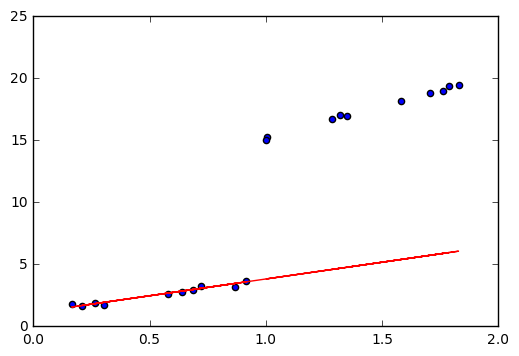

In [139]:
y_hat = fit_wls.predict()
plt.scatter(x, y)
plt.plot(x, y_hat, color = 'r')


<a href='#snap_back_3'>go back to main body</a>

<a id='#supplemental_content_1'></a>
<span class="label label-success"> Commentary and Supplemental Content </span>

### What is the Equity Risk Premium?

The equity risk premium is a fundamental concept in finance and is at its core the amount that risky securities need to pay you in order for you to prefer holding them versus holding non-risky securities. 

Let's imagine a simplified scenario. We are investors and we have money to invest. There are two parties that want our money. The US government wants our money in order to pay for things like national defense, nutritional assistance programs, healthcare for the poor and elderly, and foreign aid. The government says they will pay us 3% on our investment every year guaranteed (and let's just accept on face value that their guarantee is actually good). So there is no risk that we won't get our original investment back plus the 3% per year they promised. 

Alternatively, another group wants our money. This group is a collection of all US corporations. They want our money in order to build factories, pay their employees, buy other companies and invest in research to develop new technologies. This investment is inherently risky because there's no guarantee that their factories will make a product people want to buy or that their research in new technology will discover anything of value. So it's possible they will be able to pay us 10% in a given year, a possibility they'll only be able to pay 5% in another year, a possibility they won't be able to pay us anything (say -20% in yet another year), and really an infinite number of possible payoff scenarios. 

If on average the corporations could only pay you 2% per year then that's not a very good proposition. They will pay you less than the government (3%) and do so with greater uncertainty of the payoff each year. That uncertainty is generally considered a negative and therefore in order to compensate you for taking on that negative (uncertainty), they really should pay you more. The amount that they pay you above the risk-free rate is known as the equity risk premium. 

So let's say that corporations say that they will pay you on average 5% per year and the government will pay you 3%. Your excess return, aka the equity risk premium, is 2%. We don't consider the 3% to be particularly meaningful because you could have gotten that while taking no risk. Hull et al. therefore use the equity risk premium as their target variable, rather than just the S&P 500 return. 

So how do you actually calculate the equity risk premium? Since we're working with monthly data we can define it as the S&P 500 Return over the next month minus the Risk Free Return over the next month. There are many different ways of defining the risk free return and a common way of doing it is by taking the return of US Treasuries. In Notebook 2 we downloaded the yield of the 3M treasury so we can use that. 

Note that this technically isn't a perfect proxy for the risk free return since we are looking for a 1M return while the 3M Treasury is based on holding the security for three months. But it'll suffice. Remember to convert the yield (which is an annual rate) into a monthly return. 


<a href='#snap_back_1'>go back to main body</a>

<a id='#supplemental_content_2'></a>
<span class="label label-success"> Commentary and Supplemental Content </span>

### The meaning of weights

The Paper indicates that it allocates unequal weight for each observation in the dataset and that the weights are are function of time. From a technical perspective, when we refer to weights there is sometimes an implication that the sum of the weights is one. Note that when Hull et Al. refer to weights that is not the case. 

<a href='#snap_back_2'>go back to main body</a>